# Библиотека `pandas`: часть 2

*Алла Тамбовцева*

## Домашнее задание 

### Описание домашнего задания и формат сдачи

В домашнем задании необходимо решить предложенные задачи по программированию – вписать свой код в ячейки после условий задач вместо комментария `### YOUR CODE HERE ###` в файле *homework-pandas2.ipynb* и сохранить изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) необходимо загрузить в личный кабинет обучающей онлайн платформы Skillbox (https://go.skillbox.ru/) и отправить на проверку.

Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

### Задание 1

Загрузить таблицу из файла `Fishing.csv` и сохранить её в датафрейм `dat`. 
Вывести на экран первые 8 строк загруженного датафрейма.

In [14]:
import pandas as pd
dat = pd.read_csv('Fishing.csv')
dat.loc[0:7]

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320
5,5,6,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320
6,6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010
7,7,8,charter,56.714,0.0209,15.134,15.134,21.714,56.714,0.0678,0.0789,0.0102,0.0209,2083.3332


### Задание 2

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [16]:
import numpy as np
dat['log_income'] = np.log(dat['income'])
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182


### Задание 3

Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

***Подсказка 1:*** для нахождения абсолютного значения числа используется функция `abs()`. Пример:

    abs(-8)
    8

***Подсказка 2:*** пример с lamda-функцией в первом уроке этого модуля.

In [75]:
diff = lambda x,y: abs(x - y)
dat['pdiff'] = diff(dat['price'], dat['pbeach'])
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500,25.000
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899,19.420
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511,137.540
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724,0.000
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182,65.416


### Задание 4

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [28]:
dat.groupby('mode').agg('mean')['price']

mode
beach      35.699493
boat       41.606813
charter    75.096942
pier       30.571326
Name: price, dtype: float64

### Задание 5

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

**Посказка:** можно написать свою lambda-функцию для подсчёта разницы между медианой и средним и применить её внутри метода для агрегирования. Внимание: название самостоятельно написанной функции будет уже вводиться без кавычек. 

In [76]:
diff_median_mean = lambda x: np.median(x) - np.mean(x)
dat.groupby('mode').agg(diff_median_mean)['price']

mode
beach     -16.391493
boat      -17.004813
charter   -18.226942
pier      -13.942326
Name: price, dtype: float64

### Задание 6

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. В итоге должно получиться четыре разных csv-файла.

**Подсказка 1:** можно запустить следующий код и посмотреть, что получится: 

In [62]:
# for name, data in dat.groupby("mode"):
#     print('\n', 'NEW: {} type: {}'.format(name.title(), type(name.title())))
#     print(name, data)


**Подсказка 2:** для сохранения датафрейма в файл используется метод `.to_csv()`. Например, такой код сохранит датафрейм `dat` в файл `"Fish.csv"`:

In [0]:
#dat.to_csv("Fish.csv")

**Подсказка 3:** для склеивания строк можно использовать оператор `+`, например:

In [0]:
#"my_file" + ".xlsx"

'my_file.xlsx'

In [81]:
for name, data in dat.groupby("mode"):
    data.to_csv(''.join([name.title().lower(), '.csv']))
boat = pd.read_csv('beach.csv')
boat.head()
# beach.csv
# boat.csv
# charter.csv
# pier.csv

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,6,6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010,9.076809,0.0
1,14,14,15,beach,74.514,0.2537,74.514,74.514,74.514,93.014,0.2537,0.1498,0.2339,0.6288,8750.0010,9.076809,0.0
2,16,16,17,beach,48.114,0.1049,48.114,48.114,33.534,57.534,0.1049,0.0451,0.1574,0.4671,5416.6667,8.597236,0.0
3,25,25,26,beach,67.784,0.5333,67.784,67.784,17.862,52.862,0.5333,0.4522,0.2413,1.0266,1249.9998,7.130899,0.0
4,33,33,34,beach,9.522,0.0678,9.522,9.522,78.292,107.292,0.0678,0.0789,0.0014,0.0029,3749.9999,8.229511,0.0


### Задание 7

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [84]:
dat.sort_values(['income'], ascending = False, inplace=True)
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
524,524,525,charter,240.586,0.5391,167.374,167.374,211.586,240.586,0.0678,0.0789,0.1643,0.5391,12499.998,9.433484,73.212
130,130,131,boat,94.740,0.0108,205.270,205.270,94.740,129.740,0.0678,0.0025,0.0108,0.2377,12499.998,9.433484,110.530
932,932,933,boat,37.896,0.0531,227.376,227.376,37.896,62.896,0.2537,0.1498,0.0531,0.0052,12499.998,9.433484,189.480
36,36,37,pier,120.004,0.0789,120.004,120.004,252.640,281.640,0.0678,0.0789,0.0014,0.0029,12499.998,9.433484,0.000
377,377,378,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.998,9.433484,183.164


### Задание 8

Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? Ответ записать в виде текстовой ячейки или в виде комментария.

In [121]:
print(dat.sort_values(['price', 'income'])[:100].groupby('mode').size())
print('\n', '*' * 15, '\n')
print(dat.sort_values(['price', 'income'])[-100:].groupby('mode').size())

mode
beach    15
boat     47
pier     38
dtype: int64

 *************** 

mode
beach       7
boat       25
charter    60
pier        8
dtype: int64


ОТВЕТ: Да, люди с более высоким доходом и дорогой рыбалкой предпочитают арендованные лодки, с меньшим доходом и менее дорогим способо рыбалки - свою лодку.

### Задание 9

Любым известным способом проверить, есть ли в датафрейме пропущенные значения. Если есть, удалить строки с пропущенными значениями. Если нет, написать комментарий, что таких нет.

In [127]:
#dat.isnull().values.any()
dat.isnull().sum().sum()
# нет пропущенных значений

0

.<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> 
# Дополнительное (необязательное) задание.
<br>

### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [174]:
df = pd.read_csv('wgi_fh.csv', sep=';', decimal=',')
df.head()

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
0,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
4,Anguilla,AIA,2016,NaN,1.31,1.33,0.87,-0.09,1.23,NaN


### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.

In [176]:
print(df.info())
print(df.isnull().values.sum().sum())
print('Есть ли в таблице пропущенные значения?', '\x1b[2;37;42m'+'ДА'+', кол-во: ' + str(df.isnull().sum().sum())+'\033[0m' if df.isna().values.any() else '\x1b[7;31;47m'+'Нет'+'\033[0m')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   214 non-null    object 
 1   cnt_code  214 non-null    object 
 2   year      214 non-null    int64  
 3   va        204 non-null    float64
 4   ps        211 non-null    float64
 5   ge        209 non-null    float64
 6   rq        209 non-null    float64
 7   rl        209 non-null    float64
 8   cc        209 non-null    float64
 9   fh        197 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB
None
50
Есть ли в таблице пропущенные значения? ДА, кол-во: 50


### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [177]:
df = df.dropna()
df.head()

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
5,Albania,ALB,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
8,Argentina,ARG,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0


### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [178]:
df.set_index('cnt_code', inplace=True)
df.head()

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
ADO,Andorra,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
AGO,Angola,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
ALB,Albania,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
ARG,Argentina,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0


### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [181]:
df.sort_values(['cc', 'va'], inplace=True)
df.head()

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5


### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [186]:
df['cc_round'] = df['cc'].apply(lambda x: round(x, 1))
df.head()

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
cnt_code,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6


### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.

**Подсказка:** здесь понадобится функция, которая возвращает разные значения в зависимости от выполнения условий. Её можно написать через `def` или `lambda`. Больше про функции можно почитать на [pythontutor.ru](https://pythontutor.ru/lessons/functions/).

In [192]:
def get_fh_status(fh: float) -> str:
    if 1.0 <= fh <= 2.5:
        return 'Free'
    elif 3.0 <= fh <= 5.0:
        return 'Partly Free'
    elif 5.5 <= fh <= 7.0:
        return 'Not Free'
    else:
        return 'None'

df['fh_status'] = df['fh'].apply(get_fh_status)
df.head()

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
cnt_code,,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,Not Free
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,Not Free
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,Not Free
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,Not Free
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,Not Free


### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [209]:
print('Группа\tМин\tСреднее\tМах\n')
for name, data in df.groupby('fh_status'):
    print('{}\t{}\t{}\t{}'.format(
        name, 
        round(data['ps'].min(), 2),
        round(data['ps'].mean(), 2),
        round(data['ps'].max(), 2)
    ))

Группа	Мин	Среднее	Мах

Free	-0.99	0.62	1.49
Not Free	-2.91	-0.88	1.26
Partly Free	-2.47	-0.42	1.53


### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

**Подсказка 1:** цикл `for`.

**Подсказка 2:**  [метод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) `.to_csv()` для выгрузки датафреймов `pandas` в csv-файлы.

In [210]:
for name, data in df.groupby("fh_status"):
    data.to_csv(''.join([name.title().lower().replace(' ', '_'), '.csv']))
free = pd.read_csv('beach.csv')
free.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,6,6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010,9.076809,0.0
1,14,14,15,beach,74.514,0.2537,74.514,74.514,74.514,93.014,0.2537,0.1498,0.2339,0.6288,8750.0010,9.076809,0.0
2,16,16,17,beach,48.114,0.1049,48.114,48.114,33.534,57.534,0.1049,0.0451,0.1574,0.4671,5416.6667,8.597236,0.0
3,25,25,26,beach,67.784,0.5333,67.784,67.784,17.862,52.862,0.5333,0.4522,0.2413,1.0266,1249.9998,7.130899,0.0
4,33,33,34,beach,9.522,0.0678,9.522,9.522,78.292,107.292,0.0678,0.0789,0.0014,0.0029,3749.9999,8.229511,0.0


### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

In [212]:
d = {'fh_type': ['free', 'partly free', 'not free'], 'count': [32, 24, 47]}
df_fh = pd.DataFrame(data=d)
df_fh

,fh_type,count
0,free,32
1,partly free,24
2,not free,47


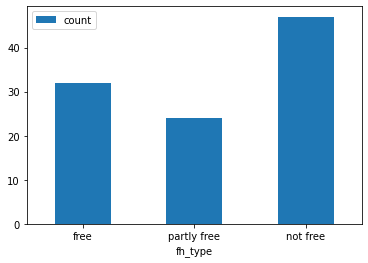

In [233]:
%matplotlib inline
ax = df_fh.plot.bar(x='fh_type', y='count', rot=0)